# Aula 03 - Parte 03


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle



Durante esta etapa, vamos aplicar transformações a imagens. Vamos partir de uma ideia que já tivemos e então passar algum tempo corrigindo os problemas que encontraremos pelo caminho.

O plano é o seguinte:

* Vamos partir de uma imagem, que é representada como uma matriz de pixels $X$
* Cada pixel será referido como um vetor $v=(i,j)$, e todos os pixels juntos formam a matriz $V$.
* Gostaríammos de aplicar uma transformação $A$ ao conjunto de pixels, de forma que o pixel $(i,j)$ passe a ocupar a posição $(i', j')$ na imagem transformada
* A imagem transformada será referida como $Y$.

# Exercício 1
**Objetivo: abrir e visualizar uma imagem**

Veja o código abaixo. Ele demonstra como abrir uma matriz e como mostrá-la na tela usando `matplotlib`.

1. O que os eixos da figura representam?
2. Quais são as dimensões da variável `image` e o que elas representam?

<class 'numpy.ndarray'>
(427, 640, 3)


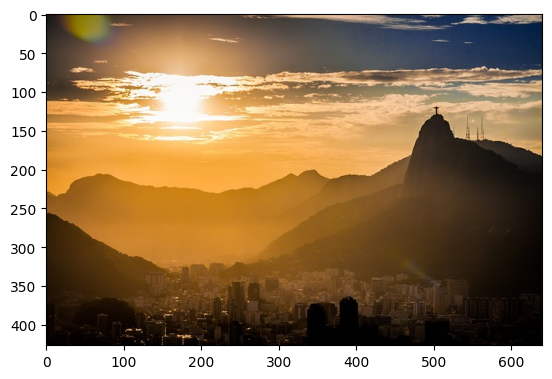

In [7]:
image = mpimg.imread("rio_de_janeiro.jpg")
print(type(image))
print(image.shape)
plt.figure()
plt.imshow(image)
plt.show()

# Exercício 2
**Objetivo: acessar multiplos elementos de um array de numpy**

Uma maneira de acessar vários elementos de um array de numpy simultaneamente é usar um outro array como indexador. Por exemplo:

In [8]:
y = np.array([1, 2, 3, 4, 5])
idx = np.array([4, 3, 2])
print(y[idx])

[5 4 3]


In [9]:
x = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.zeros_like(x)
origem_i = np.array([1, 0])
origem_j = np.array([2, 1])
destino_i = np.array([0, 1])
destino_j = np.array([0, 0])
y[destino_i, destino_j] = x[origem_i, origem_j]
print(y)

[[6 0 0]
 [2 0 0]
 [0 0 0]]


Podemos automatizar esse processo usando um *produto cartesiano*. Ele funciona criando vetores que têm todos os pares $i,j$ de elementos dos vetores que são recebidos como entrada:

In [10]:
def criar_indices(min_i, max_i, min_j, max_j):
    import itertools
    L = list(itertools.product(range(min_i, max_i), range(min_j, max_j)))
    idx_i = np.array([e[0] for e in L])
    idx_j = np.array([e[1] for e in L])
    idx = np.vstack( (idx_i, idx_j) )
    return idx

a = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a, "\n")
X = criar_indices(0, 3, 0, 2)
print(X, "\n")
b = np.zeros_like(a)
b[X[0,:], X[1,:]] = a[X[0,:], X[1,:]]
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[0 0 1 1 2 2]
 [0 1 0 1 0 1]] 

[[1 2 0]
 [4 5 0]
 [7 8 0]]


O código abaixo usa o meshgrid para recortar um pedaço da imagem recebida como entrada.

1. Explique como o código funciona
2. Altere o código para que o pedaço recortado inclua o cristo redentor

(427, 640, 3)


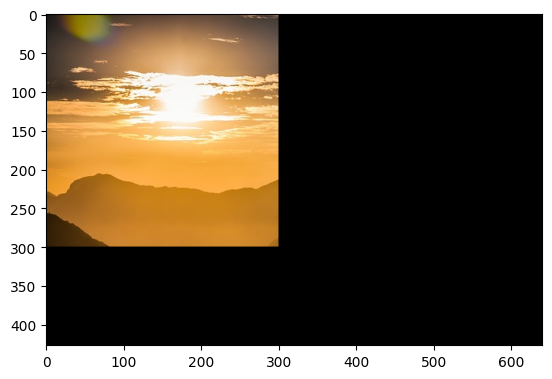

In [15]:
image = mpimg.imread("rio_de_janeiro.jpg")
image_ = np.zeros_like(image)

X = criar_indices(0, 300, 0, 300)
image_[X[0,:], X[1,:], :] = image[X[0,:], X[1,:], :]

print(image_.shape)
plt.figure()
plt.imshow(image_)
plt.show()

# Exercício 3
**Objetivo: transformar os pixels que buscamos acessar**

Vamos agora implementar uma ideia. Temos uma matriz de índices $X$. Podemos entender esses índices como uma núvem de pontos. Daí então, aplicamos uma transformação sobre ela, modificando a posição dos pixels de destino, isto é:

$$
X_{\text{destino}} = A X
$$

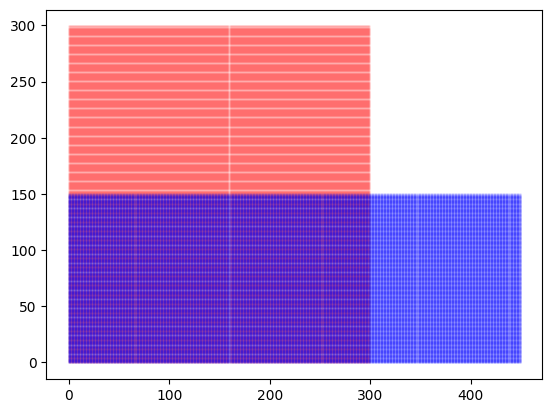

In [16]:
X = criar_indices(0, 300, 0, 300)

A = np.array([[0.5, 0], [0, 1.5]])
Xd = A @ X

plt.figure()
plt.scatter(X[1,:], X[0,:], c='r', s=1, alpha=0.1)
plt.scatter(Xd[1,:], Xd[0,:], c='b', s=1, alpha=0.1)
plt.show()

Essa transformação pode ser usada para mapear pixels na imagem de origem para pixels na imagem de destino! Veja, por exemplo: 

(427, 640, 3)


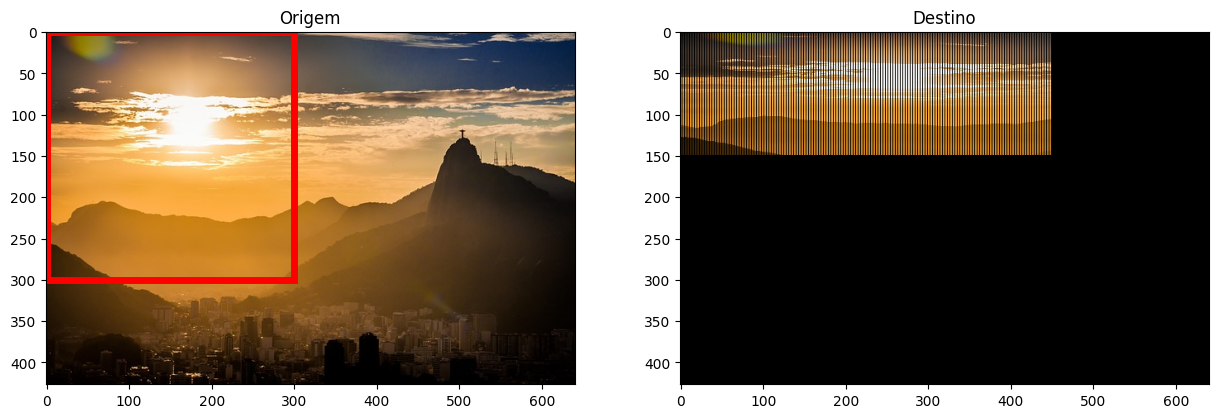

In [17]:
image = mpimg.imread("rio_de_janeiro.jpg")
image_ = np.zeros_like(image)

X = criar_indices(0, 300, 0, 300)

A = np.array([[0.5, 0], [0, 1.5]])
Xd = A @ X
Xd = Xd.astype(int)

image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]

print(image_.shape)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image)
# Adiciona o retângulo indicando a área que foi recortada:
plt.gca().add_patch(Rectangle((0,0),300,300,linewidth=5,edgecolor='r',facecolor='none'))

plt.title('Origem')
plt.subplot(1,2,2)
plt.imshow(image_)
plt.title('Destino')
plt.show()

Alterando o código acima, verifique o efeito das seguintes matrizes de transformação $A$:

$$
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}
,
\begin{bmatrix}
0 & 1 \\
1 & 0 
\end{bmatrix}
,
\begin{bmatrix}
1 & 0.2 \\
0 & 1 
\end{bmatrix}
,
\begin{bmatrix}
1 & 0 \\
0.2 & 1 
\end{bmatrix}
,
\begin{bmatrix}
1 & 0 \\
0 & 3 
\end{bmatrix}
$$

# Exercício 4
**Objetivo: resolver as dificuldades com pixels fora da imagem**

Quando a matriz de transformação é:
$$
A = 
\begin{bmatrix}
-3 & 0 \\
0 & 3 
\end{bmatrix}
$$

temos o problema de encontrar pixels de destino fora da imagem, gerando um erro.

Uma solução para evitar esse erro é remover os pixels *out-of-bounds* usando um filtro. Por exemplo:

In [18]:
a = np.array([1, 2, 3, 4, 5])
filtro = a > 3
a = a[filtro]
print(a)

[4 5]


Usando um filtro, proponha uma modificação no código anterior para evitar os pixels *out-of-bounds*.

# Exercício 5
**Objetivo: manipular a translação em imagens e fazer efeitos compostos**

O código abaixo implementa uma operação de translação em nosso recorte. Modifique o código para que a translação seja de 50 pixels na horizontal e 50 pixels na vertical.

(3, 90000)
(427, 640, 3)


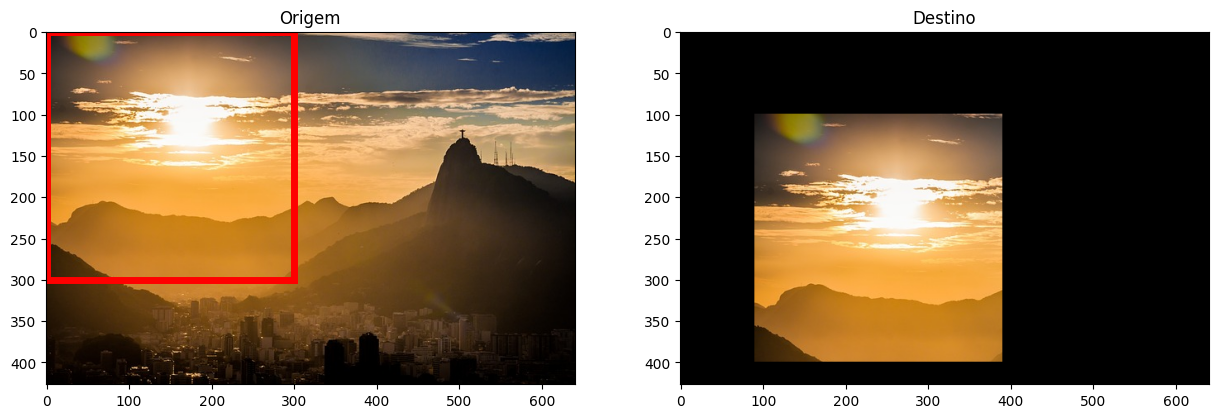

In [19]:
image = mpimg.imread("rio_de_janeiro.jpg")
image_ = np.zeros_like(image)

X = criar_indices(0, 300, 0, 300)
X = np.vstack ( (X, np.ones( X.shape[1]) ) )

A = np.array([[1, 0, 100], [0, 1, 90], [0, 0,1]])
Xd = A @ X
Xd = Xd.astype(int)
X = X.astype(int)

print(Xd.shape)

image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]

print(image_.shape)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image)
# Adiciona o retângulo indicando a área que foi recortada:
plt.gca().add_patch(Rectangle((0,0),300,300,linewidth=5,edgecolor='r',facecolor='none'))

plt.title('Origem')
plt.subplot(1,2,2)
plt.imshow(image_)
plt.title('Destino')
plt.show()

# Exercício 6
**Objetivo: aplicar transformações compostas**

Uma matriz que implementa a rotação em 45 graus, na representação que temos até o momento, com uma dimensão adicional, pode ser:

$$
R = 
\begin{bmatrix}
    0.7 & -0.7 & 0\\
    0.7 & 0.7 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

Porém, essa rotação acontece ao redor da origem. Se quisermos rotacionar nossa imagem ao redor de um ponto arbitrário, precisamos, nesta ordem:
1. Transladar a imagem de tal forma que o ponto fique na origem
2. Realizar a rotação
3. Transladar a imagem de volta à sua posição original.

(a) Tomando por base o código abaixo, implemente uma operação de rotação da imagem de destino ao redor do pixel $(150,150)$.

(b) Encontre uma matriz que realiza a transformação do ítem (a) com uma única operação de multiplicação matricial.

(427, 640, 3)


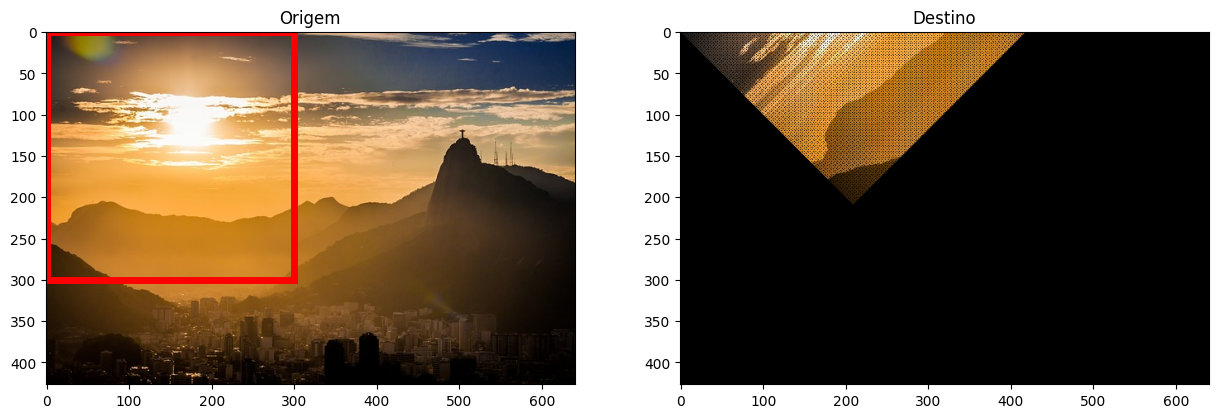

In [20]:
image = mpimg.imread("rio_de_janeiro.jpg")
image_ = np.zeros_like(image)

X = criar_indices(0, 300, 0, 300)
X = np.vstack ( (X, np.ones( X.shape[1]) ) )

R = np.array([[0.7, -0.7, 0], [0.7, 0.7, 0], [0, 0,1]])

Xd = R @ X
Xd = Xd.astype(int)
X = X.astype(int)

# Troque este código pelo seu código de filtragem de pixels
Xd[0,:] = np.clip(Xd[0,:], 0, image.shape[0])
Xd[1,:] = np.clip(Xd[1,:], 0, image.shape[1])

image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]

print(image_.shape)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image)
# Adiciona o retângulo indicando a área que foi recortada:
plt.gca().add_patch(Rectangle((0,0),300,300,linewidth=5,edgecolor='r',facecolor='none'))

plt.title('Origem')
plt.subplot(1,2,2)
plt.imshow(image_)
plt.title('Destino')
plt.show()